<a href="https://colab.research.google.com/github/n1lays1ngh/Delhi-Air-Quality-Prediction/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import os
import pandas as pd
data_folder_path = '/content/drive/MyDrive/Pollutant Data'
input_file = os.path.join(data_folder_path, 'Final_Dataset.csv')


In [6]:
Data = pd.read_csv(input_file)

In [7]:
Data.head()

,Date,index,AQI,Month_sin,Month_cos,DayOfWeek_sin,DayOfWeek_cos,DayOfYear_sin,DayOfYear_cos,AQI_lag_1,...,humidity_is_missing,precip_is_missing,windspeed_is_missing,sealevelpressure_is_missing,cond_unknown,cond_clear,cond_partially_cloudy,cond_rain_partially_cloudy,cond_rain,cond_rain_overcast
0,2017-01-08,7,288.0,0.5,0.866025,-0.781831,0.623490,0.137185,0.990545,278.0,...,1,1,1,1,1,0,0,0,0,0
1,2017-01-09,8,308.0,0.5,0.866025,0.000000,1.000000,0.154204,0.988039,288.0,...,1,1,1,1,1,0,0,0,0,0
2,2017-01-10,9,247.0,0.5,0.866025,0.781831,0.623490,0.171177,0.985240,308.0,...,1,1,1,1,1,0,0,0,0,0
3,2017-01-11,10,280.0,0.5,0.866025,0.974928,-0.222521,0.188099,0.982150,247.0,...,1,1,1,1,1,0,0,0,0,0
4,2017-01-12,11,323.0,0.5,0.866025,0.433884,-0.900969,0.204966,0.978769,280.0,...,1,1,1,1,1,0,0,0,0,0


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


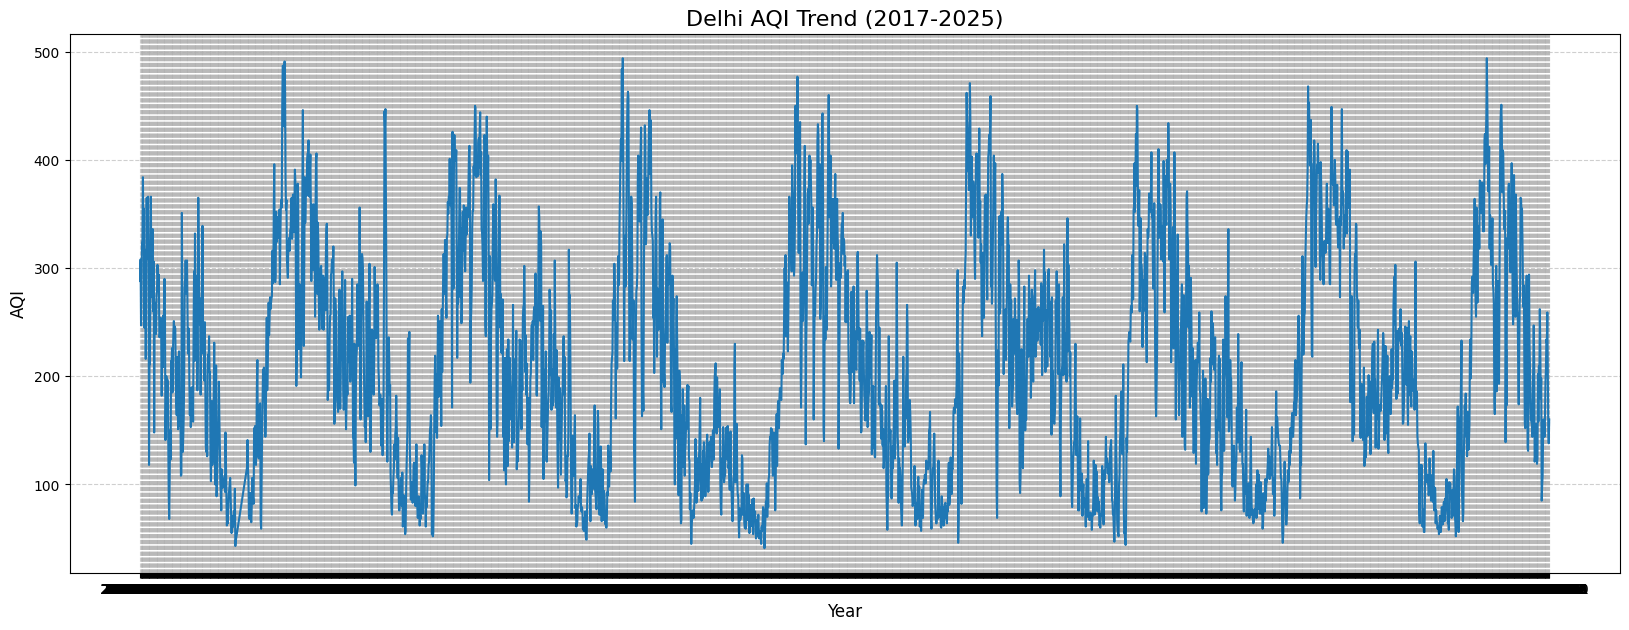

In [13]:
plt.figure(figsize=(20,7))
sns.lineplot(
    data=Data,
    x='Date',
    y='AQI'
)
plt.title('Delhi AQI Trend (2017-2025)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('AQI', fontsize=12)

plt.show()

In [15]:
fig = px.line(
    Data,
    x='Date',
    y='AQI',
    title='Delhi AQI Trend (2017-2025) - Interactive'
)


fig.update_traces(hovertemplate='<b>Date</b>: %{x|%Y-%m-%d}<br><b>AQI</b>: %{y:.0f}')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=2, label="2y", step="year", stepmode="backward"),
            dict(count=5, label="5y", step="year", stepmode="backward"),
            dict(label="All", step="all")
        ])
    )
)

fig.update_layout(
    xaxis_title='Date',
    yaxis_title='AQI'
)

fig.show()

In [16]:
fig = px.histogram(
    Data,
    x='AQI',
    nbins=50,
    title='Distribution of AQI Values (Interactive)'
)

# Add a "rug plot" at the bottom to show individual data points
fig.update_layout(
    bargap=0.1,
    xaxis_title='AQI',
    yaxis_title='Frequency (Number of Days)'
)

fig.show()

Generating Correlation Heatmap...


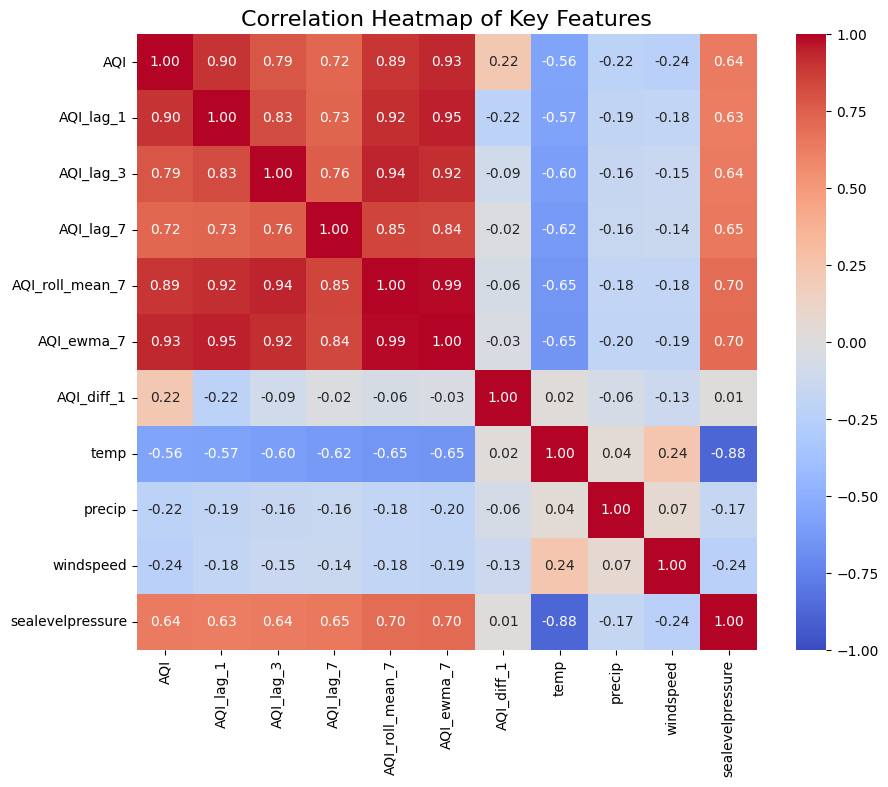

In [22]:
key_features = [
    'AQI',
    'AQI_lag_1',
    'AQI_lag_3',
    'AQI_lag_7',
    'AQI_roll_mean_7',
    'AQI_ewma_7',
    'AQI_diff_1',
    'temp',
    'precip',
    'windspeed',
    'sealevelpressure'
]
df_heatmap = Data[key_features]

# --- 3. Calculate Correlation Matrix ---
corr_matrix = df_heatmap.corr()

# --- 4. Plot the Heatmap ---

print("Generating Correlation Heatmap...")
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,      # Show the correlation numbers
    fmt=".2f",       # Format numbers to 2 decimal places
    cmap='coolwarm', # Use a blue-to-red color scheme
    vmin=-1,         # Set the min of the color bar to -1
    vmax=1           # Set the max of the color bar to +1
)
plt.title('Correlation Heatmap of Key Features', fontsize=16)
plt.show()

Successfully converted 'Date' column to datetime.
Generating AQI by Month Box Plot...


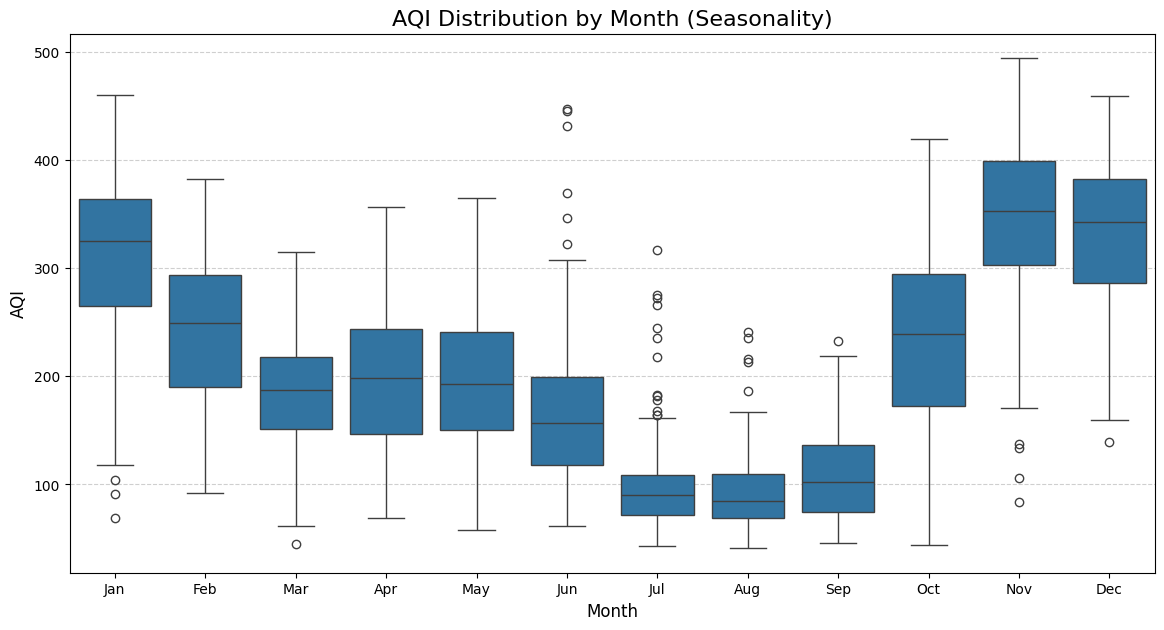

In [20]:
try:
    Data['Date'] = pd.to_datetime(Data['Date'])
    print("Successfully converted 'Date' column to datetime.")
except Exception as e:
    print(f"Error converting 'Date' column: {e}")
    # Stop if conversion fails
    raise

# --- 3. Create 'Month' and 'Month_Name' columns ---
# These lines will now work
Data['Month'] = Data['Date'].dt.month
Data['Month_Name'] = Data['Date'].dt.strftime('%b') # Gets 'Jan', 'Feb', etc.

# --- 4. Plot the Box Plot ---

print("Generating AQI by Month Box Plot...")
plt.figure(figsize=(14, 7))

# We order the months by their number (1-12)
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

sns.boxplot(
    data=Data,
    x='Month_Name',
    y='AQI',
    order=month_order
)
plt.title('AQI Distribution by Month (Seasonality)', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('AQI', fontsize=12)
plt.grid(True, linestyle='--', axis='y', alpha=0.6)
plt.show()